In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv("C:/Users/aksha/Desktop/Netz/Datasets/regression_train.csv")
df.head

<bound method NDFrame.head of       data1  data2 data3      data4   data5  data6     data7  data8 data9  \
0         8    279     C  14.451155  1139.0    1.0  9.302908    1.0     M   
1         1    108     H  14.207448  1656.0    1.0  7.220130    0.0     M   
2         8    258     A  19.220830  2817.0    1.0  8.727214    1.0     M   
3         4    147     A  15.752732  1948.0    1.0  6.078818    1.0     M   
4         5    230     H  10.195407  1336.0    1.0  4.749185    0.0     M   
...     ...    ...   ...        ...     ...    ...       ...    ...   ...   
9995      9    263     A  16.604215  1070.0    0.0  8.979149    2.0     F   
9996      5    280     E  28.758911  2652.0    0.0  3.574129    0.0     F   
9997      6    188     D  15.963267  1359.0    0.0  2.880019    0.0     F   
9998      1    132     H  11.683401  1793.0    0.0  6.983192    2.0     F   
9999      5    264     A  21.176115  1792.0    0.0  8.276101    2.0     F   

     data10     output  
0         p  86.1089

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  object 
 3   data4   10000 non-null  float64
 4   data5   9999 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9998 non-null   float64
 7   data8   9999 non-null   float64
 8   data9   9999 non-null   object 
 9   data10  9999 non-null   object 
 10  output  9999 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [39]:
df.describe()

,data1,data2,data4,data5,data6,data7,data8,output
count,10000.000000,10000.000000,10000.000000,9999.000000,9997.000000,9998.000000,9999.000000,9999.000000
mean,4.500200,199.937000,19.980069,1999.994099,0.499850,5.032647,0.989699,67.641293
std,3.468602,57.637745,5.790647,575.293177,0.500025,2.882390,0.812112,13.373996
min,0.000000,100.000000,0.000000,4.000000,0.000000,0.001195,0.000000,30.857090
25%,2.000000,149.000000,14.928790,1505.000000,0.000000,2.541841,0.000000,57.393568
50%,4.000000,201.000000,20.000361,1999.000000,0.000000,5.008526,1.000000,67.877814
75%,7.000000,250.000000,24.979557,2490.000000,1.000000,7.520097,2.000000,77.831703
max,200.000000,299.000000,70.002000,2999.000000,1.000000,9.999848,2.000000,103.809450


In [42]:
df.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
output    0
dtype: int64

In [41]:
df.dropna(inplace=True)

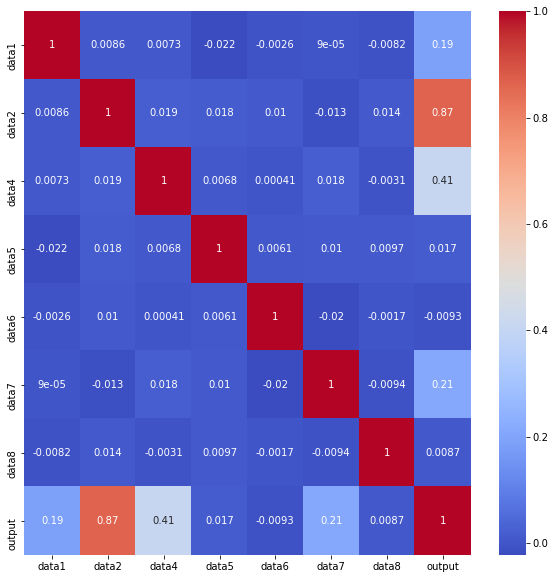

In [20]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

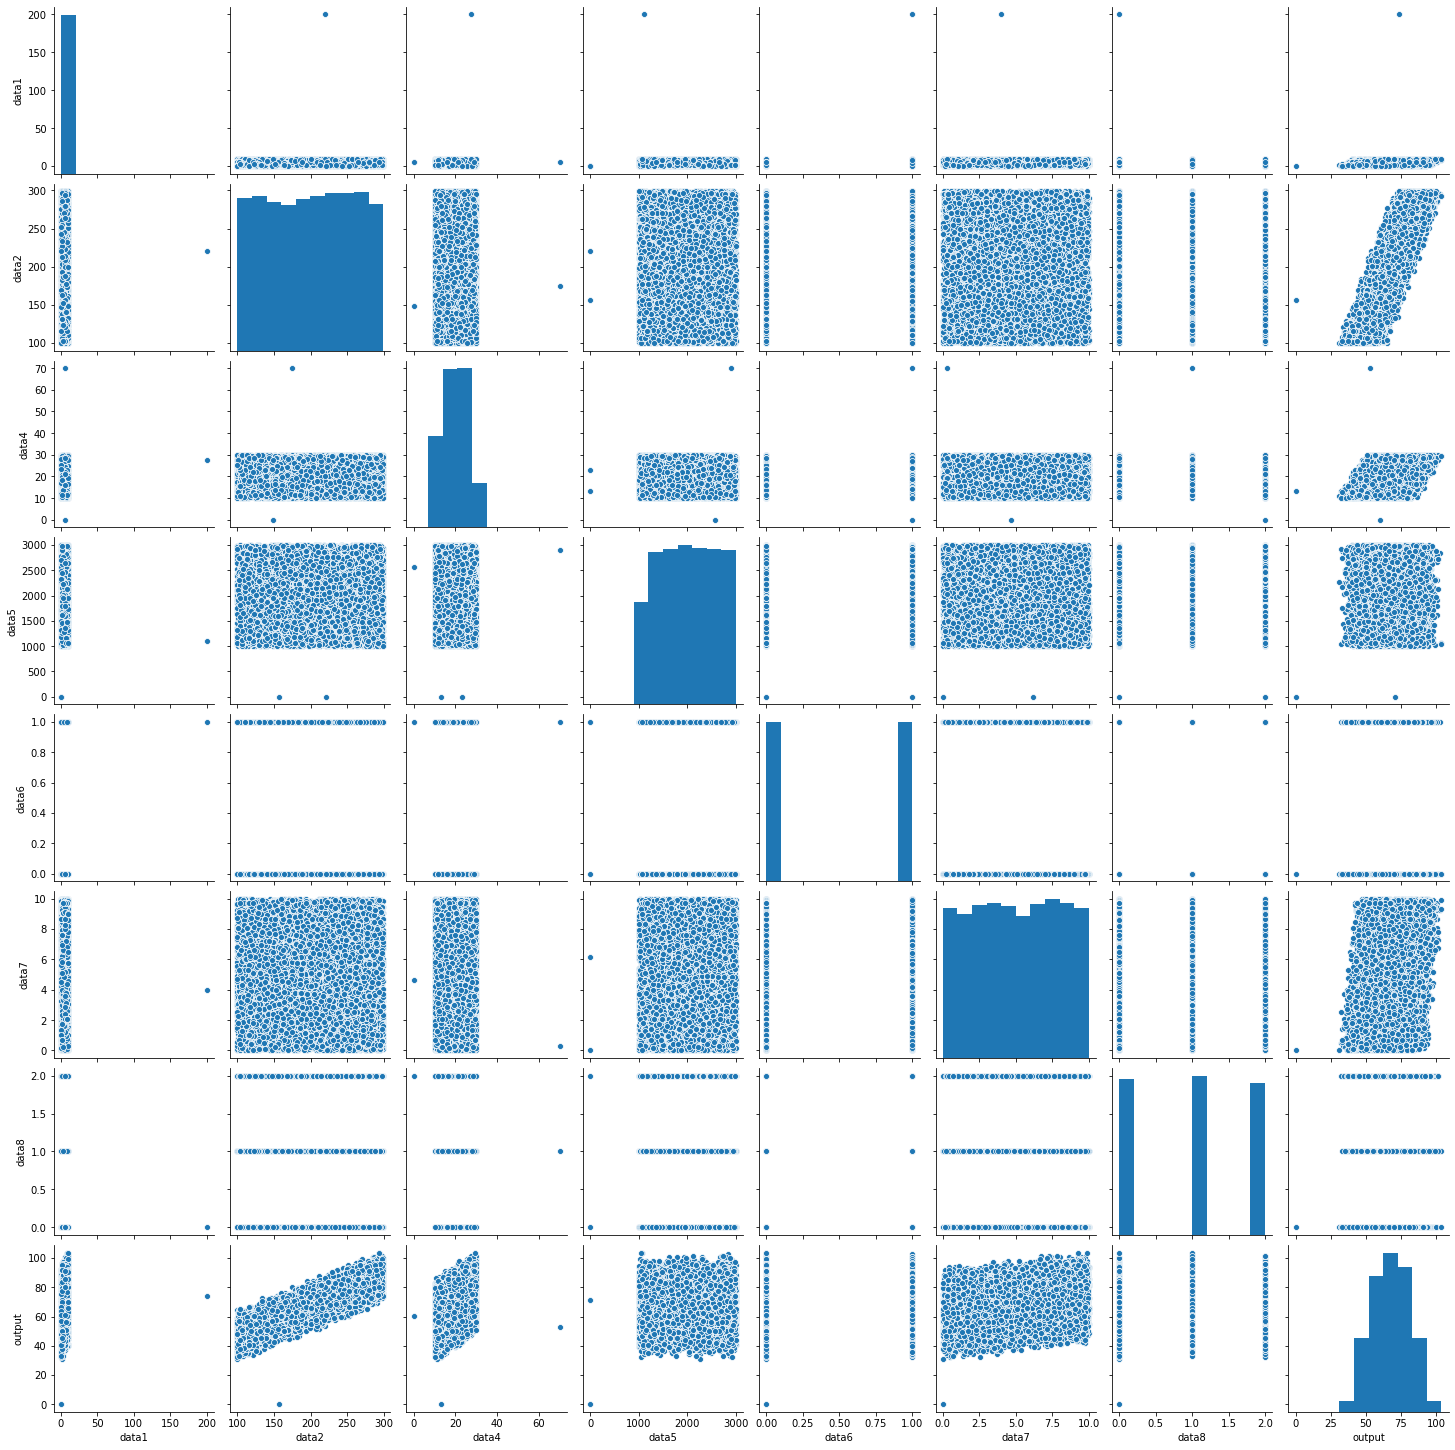

In [25]:
sns.pairplot(df)

In [43]:
# converting the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,4] =  le.fit_transform(df.iloc[:,4].values)
df.iloc[:,8] =  le.fit_transform(df.iloc[:,8].values)
df.iloc[:,9] =  le.fit_transform(df.iloc[:,9].values)
df.iloc[:,2] =  le.fit_transform(df.iloc[:,2].values)

df.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,2,14.451155,139,1.0,9.302908,1.0,1,0,86.108947
1,1,108,7,14.207448,652,1.0,7.220130,0.0,1,0,42.606833
2,8,258,0,19.220830,1808,1.0,8.727214,1.0,1,0,85.625961
3,4,147,0,15.752732,944,1.0,6.078818,1.0,1,0,53.656277
4,5,230,7,10.195407,336,1.0,4.749185,0.0,1,0,64.925051


In [44]:
df.columns

Index(['data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8',
       'data9', 'data10', 'output'],
      dtype='object')

In [47]:
x=df[['data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8','data9', 'data10']]
y=df[['output']]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lm = LinearRegression()

In [68]:
lm.fit(x_train,y_train)

LinearRegression()

In [69]:
print(lm.intercept_)

[0.61478397]


In [71]:
lm.coef_

array([[ 9.99370057e-01,  2.00087686e-01,  5.77299392e-03,
         8.87288218e-01, -2.22940623e-05, -1.52527108e-02,
         1.00531673e+00, -2.81785302e-04, -4.00167823e-01,
         0.00000000e+00]])

In [73]:
x.columns

Index(['data1', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8',
       'data9', 'data10'],
      dtype='object')

In [76]:
coef=pd.DataFrame(lm.coef_,x.columns)

ValueError: Shape of passed values is (1, 10), indices imply (10, 10)

In [77]:
predictions = lm.predict(x_test)

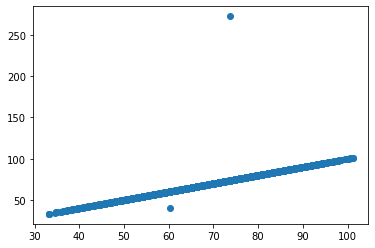

In [78]:
plt.scatter(y_test,predictions)

In [80]:
from sklearn import metrics

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.12102933062010311
MSE: 9.981992218217297
RMSE: 3.1594290968808427
